In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import string
import nltk
from nltk.corpus import stopwords

In [26]:
# Load the dataset 
data = pd.read_csv("spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [27]:
data.shape

(5572, 2)

In [28]:
# Encode labels ('spam' -> 1, 'ham' -> 0)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
data['Category'] = encoder.fit_transform(data['Category'])

In [30]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# missing values
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [32]:
# duplicates values
data.duplicated().sum()

np.int64(415)

In [33]:
# rremove duplicates
data = data.drop_duplicates(keep = 'first')

In [34]:
data.duplicated().sum()

np.int64(0)

In [35]:
data.shape

(5157, 2)

In [36]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
data['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [38]:
# Preprocess the text
def preprocess_text(text):
    text = text.lower()                      # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()                    # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)

data['clean_text'] = data['Message'].apply(preprocess_text)

C:\Users\ANSHU SINGH\AppData\Local\Temp\ipykernel_10272\4039264982.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['Message'].apply(preprocess_text)


In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['Category'], test_size=0.2)

In [47]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [61]:
# Train model (Naive Bayes)
model = MultinomialNB(class_prior=[0.4, 0.6])  # favoring spam a bit more
model.fit(X_train_tfidf, y_train)

MultinomialNB(class_prior=[0.4, 0.6])

In [62]:
X_test_transformed = feature_extraction.transform(X_test)
y_scores = model.predict_proba(X_test_transformed)[:, 1]

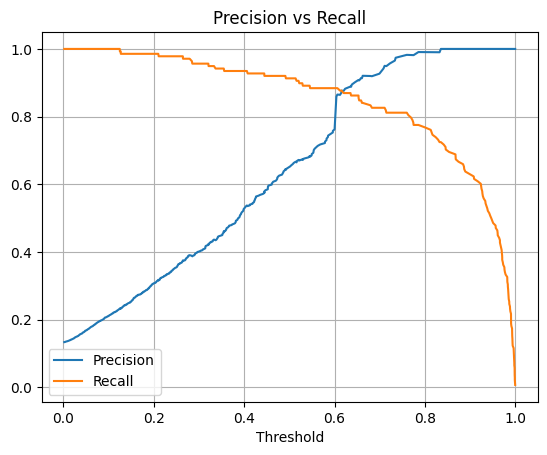

In [63]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.title("Precision vs Recall")
plt.legend()
plt.grid(True)
plt.show()


In [64]:
best_threshold = 0
best_f1 = 0
from sklearn.metrics import f1_score

for threshold in [i/100 for i in range(30, 90, 5)]:
    y_pred = (y_scores > threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1:.2f}")

    if precision > 0.90 and f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\n Best threshold with precision > 0.90: {best_threshold} (F1 = {best_f1:.2f})")


Threshold: 0.30 | Precision: 0.40 | Recall: 0.96 | F1 Score: 0.57
Threshold: 0.35 | Precision: 0.45 | Recall: 0.94 | F1 Score: 0.61
Threshold: 0.40 | Precision: 0.53 | Recall: 0.93 | F1 Score: 0.68
Threshold: 0.45 | Precision: 0.59 | Recall: 0.92 | F1 Score: 0.72
Threshold: 0.50 | Precision: 0.65 | Recall: 0.91 | F1 Score: 0.76
Threshold: 0.55 | Precision: 0.69 | Recall: 0.88 | F1 Score: 0.78
Threshold: 0.60 | Precision: 0.85 | Recall: 0.88 | F1 Score: 0.87
Threshold: 0.65 | Precision: 0.91 | Recall: 0.86 | F1 Score: 0.88
Threshold: 0.70 | Precision: 0.93 | Recall: 0.83 | F1 Score: 0.88
Threshold: 0.75 | Precision: 0.98 | Recall: 0.81 | F1 Score: 0.89
Threshold: 0.80 | Precision: 0.99 | Recall: 0.76 | F1 Score: 0.86
Threshold: 0.85 | Precision: 1.00 | Recall: 0.70 | F1 Score: 0.82

 Best threshold with precision > 0.90: 0.75 (F1 = 0.89)


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use best threshold 
threshold = 0.75
y_pred = (y_scores > threshold).astype(int)

# Final evaluation
print("Final Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Final Model Metrics:
Accuracy: 0.9728682170542635
Precision: 0.9824561403508771
Recall: 0.8115942028985508
F1 Score: 0.8888888888888888


In [67]:
# Prediction on new email
def predict_email(text):
    cleaned = preprocess_text(text)
    vector = vectorizer.transform([cleaned])
    return model.predict(vector)[0]

In [68]:
print("Spam" if predict_email("Congratulations! You've won a $1000 Walmart gift card.") else "Ham")

Spam


project/
│
├── app.py
├── model.pkl
├── vectorizer.pkl
└── templates/
    └── index.html



In [69]:
!pip install flask

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle

# Example dataset (replace with your actual dataset)
X = data['Message']
y = data['Category']  # Assuming already encoded with LabelEncoder

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Train the model
classifier = MultinomialNB()
classifier.fit(X_train_features, y_train)

# Save the model and vectorizer
pickle.dump(classifier, open('model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
